<font color='#43BFC7'>

# **Think Like a Data Scientist - EDA Exercise**</font>

The Seattle Fremont Bridge is a major birdge that connects two densely populated and historic neighborhoods in Seattle. Bicycle traffic surpasses 1 million rides annually. For this EDA exercise, city officials would like to see what can be learned from the data to predict bicycle traffic/demand (say, to help optimize load balancing).

You are provided with 2 datasets for this exercise:
1. `fremont-bridge-bicycle-counts.csv`: Bicycle counts from the inductive bicycle counters installed on both sides of the bridge since 2012.
2. `NOAA_Seattle-data.csv`: Weather and atmospheric data from NOAA, for the same period of time.

Your task is to explore the data and see what interesting findings you get from it! EDA exercises are by their nature very open ended. You often aren't given much direction in terms of what specifically to look for. Get a 'feel' for your data, see what's there, and think about how you might use it.
<font color='#43BFC7'>

**Goal: From your EDA, formulate 1 (or more) hypothesis that you'd like to test in a subsequent stage.**</font>

*Note that you are provided a data dictionary for the NOAA Seattle data,see NOAA_Seattle-data_dictionary.txt*.

<font color='#43BFC7'>

### **0. Import libraries and read in data**</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 50)

In [3]:
# Read in datasets:
fremont = pd.read_csv('fremont-bridge-bicycle-counts.csv')
noaa = pd.read_csv('NOAA_Seattle-data.csv')

<font color='#43BFC7'>

### **1. Look at the data!**</font>

In [4]:
fremont.head()

,Date,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,2012-10-03T00:00:00.000,13.0,4.0,9.0
1,2012-10-03T01:00:00.000,10.0,4.0,6.0
2,2012-10-03T02:00:00.000,2.0,1.0,1.0
3,2012-10-03T03:00:00.000,5.0,2.0,3.0
4,2012-10-03T04:00:00.000,7.0,6.0,1.0


In [5]:
noaa.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,FOG,HEAVY-FOG_MIST,THUNDER,ICE-PELLETS,HAIL,GLAZE,SMOKE,BLOWING-SNOW,MIST,DRIZZLE,RAIN,SNOW.1,FREEZING-RAIN
0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-03,16.33,NaN,0.0,0.0,0.0,NaN,66,46,10,20.0,23.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-04,14.54,NaN,0.0,0.0,0.0,NaN,66,47,20,20.0,21.0,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-05,12.75,NaN,0.0,0.0,0.0,NaN,71,48,360,360.0,17.9,21.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-06,11.41,NaN,0.0,0.0,0.0,NaN,75,46,20,20.0,17.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-07,2.91,NaN,0.0,0.0,0.0,NaN,75,46,30,10.0,12.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Dataset sizes (rows and columns):
print(fremont.shape)
print(noaa.shape)

(62040, 4)
(2585, 28)


<font color='#43BFC7'>

**Part 1 Conclusions**

Just looking at the data makes working with it much more intuitive. We can see the field names, the size of the datasets, and get an initial sense into the formats of the values in each field.
- Fremont bridge data is split into 2 "sides", east sidewalk and west sidewalk.
- The NOAA weather data has many columns, not all of the column names are descriptive. (Hence why we included the data dictionary.)
- The Fremont bicycle counter data seems to be be on an hourly basis, whereas the NOAA data seems to be on a daily basis.
- There are many NaNs in the NOAA data, maybe these are for days where these fields don't apply (like if there's no rain).</font>

<font color='#43BFC7'>

### **2. Some data quality checks**</font>

In [7]:
# First, let's lower-case and rename the column names so that they're easier to work with:
fremont.columns = [c.lower().replace(' ', '_') for c in fremont.columns]
noaa.columns = [c.lower().replace(' ', '_') for c in noaa.columns]

column_rename_dict = {'fremont_bridge_total':'total', 'fremont_bridge_east_sidewalk':'east_sw', 'fremont_bridge_west_sidewalk':'west_sw'}
fremont.rename(columns=column_rename_dict, inplace = True)
print(fremont.columns)

Index(['date', 'total', 'east_sw', 'west_sw'], dtype='object')


In [8]:
# Check variable data types
print('----fremont----')
print(fremont.dtypes)
print('----noaa----')
print(noaa.dtypes)

----fremont----
date        object
total      float64
east_sw    float64
west_sw    float64
dtype: object
----noaa----
station            object
name               object
date               object
awnd              float64
pgtm              float64
prcp              float64
snow              float64
snwd              float64
tavg              float64
tmax                int64
tmin                int64
wdf2                int64
wdf5              float64
wsf2              float64
wsf5              float64
fog               float64
heavy-fog_mist    float64
thunder           float64
ice-pellets       float64
hail              float64
glaze             float64
smoke             float64
blowing-snow      float64
mist              float64
drizzle           float64
rain              float64
snow.1            float64
freezing-rain     float64
dtype: object


In [9]:
# Verify the format of the date fields (They're actually both strings! Not datetime!)
print('Fremont Date field:', type(fremont['date'].values[0]))
print('NOAA Date field:', type(noaa['date'].values[0]))

Fremont Date field: <class 'str'>
NOAA Date field: <class 'str'>


In [10]:
# Does the NOAA data all come from 1 weather station? (Answer: Yes they do)
noaa['name'].value_counts()

name
SEATTLE TACOMA AIRPORT, WA US    2585
Name: count, dtype: int64

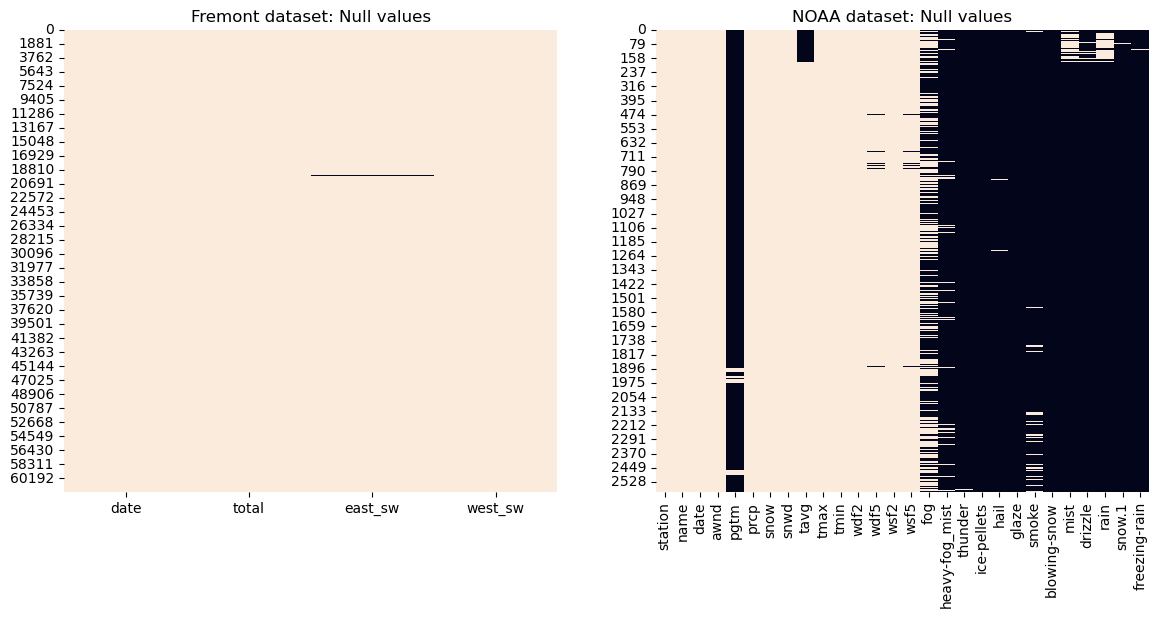

In [11]:
# Visualize the missing values in each dataset (light color = not-null, dark = null)
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
a = sns.heatmap(fremont.notnull(), cbar=False, ax=ax[0])
b = sns.heatmap(noaa.notnull(), cbar=False, ax=ax[1])
a.set_title('Fremont dataset: Null values')
b.set_title('NOAA dataset: Null values')
plt.show()

In [12]:
# Let's convert the Fremont Date field into separate year/month/date/time fields:
fremont['datetime'] = pd.to_datetime(fremont['date'])
fremont['time'] = fremont['datetime'].dt.time
fremont['year'] = fremont['datetime'].dt.year
fremont['month'] = fremont['datetime'].dt.month
fremont['date'] = fremont['datetime'].dt.date
fremont['year_mon'] = fremont['datetime'].dt.to_period('M')
fremont = fremont[['datetime', 'year', 'month', 'date', 'time', 'year_mon', 'total', 'east_sw', 'west_sw']]
fremont.head()

,datetime,year,month,date,time,year_mon,total,east_sw,west_sw
0,2012-10-03 00:00:00,2012,10,2012-10-03,00:00:00,2012-10,13.0,4.0,9.0
1,2012-10-03 01:00:00,2012,10,2012-10-03,01:00:00,2012-10,10.0,4.0,6.0
2,2012-10-03 02:00:00,2012,10,2012-10-03,02:00:00,2012-10,2.0,1.0,1.0
3,2012-10-03 03:00:00,2012,10,2012-10-03,03:00:00,2012-10,5.0,2.0,3.0
4,2012-10-03 04:00:00,2012,10,2012-10-03,04:00:00,2012-10,7.0,6.0,1.0


In [13]:
# Same thing for NOAA dataset - convert Date to a date field:
noaa['date'] = pd.to_datetime(noaa['date']).dt.date
noaa.head(2)

,station,name,date,awnd,pgtm,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,fog,heavy-fog_mist,thunder,ice-pellets,hail,glaze,smoke,blowing-snow,mist,drizzle,rain,snow.1,freezing-rain
0,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-03,16.33,NaN,0.0,0.0,0.0,NaN,66,46,10,20.0,23.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",2012-10-04,14.54,NaN,0.0,0.0,0.0,NaN,66,47,20,20.0,21.0,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Verify that each date in the Fremont dataset indeed has 24 rows:
time_vals_per_date = fremont.groupby(by='date', as_index=False).agg({'time':'count'})
time_vals_per_date['time'].value_counts()

time
24    2585
Name: count, dtype: int64

<font color='#43BFC7'>

**Part 2 Conclusions**

A quick data quality check revealed some basic manipulations that we'd like to do with the data:
- The date fields are actually strings in both datasets. It would be good to convert them into actual date fields.
- The date fields are inconsistent between the two datasets. In the Fremont dataset it is in date-time format, while in the NOAA dataset it is in plain-date format (no time). We took care of this by splitting the Fremont date field into separate date and time fields.

In addition:
- We noticed that there are many missing values, particularly in the later NOAA fields. These extremely missing variables probably won't bring too much information in any subsequent modeling steps (a hypothesis!).
- We verified that each date in the Fremont dataset indeed has 24 rows; so each row in the Fremont dataset represents 1 hour of 1 day.</font>

<font color='#43BFC7'>

### **3. Descriptive Statistics**</font>

In [15]:
# We can use .describe() to quickly get some descriptive statistics on a dataset:
fremont.describe()

,datetime,year,month,total,east_sw,west_sw
count,62040,62040.000000,62040.000000,62030.000000,61905.000000,62030.000000
mean,2016-04-17 11:30:00,2015.789942,6.563250,114.605788,52.917147,61.795276
min,2012-10-03 00:00:00,2012.000000,1.000000,0.000000,0.000000,0.000000
25%,2014-07-11 05:45:00,2014.000000,4.000000,15.000000,7.000000,7.000000
50%,2016-04-17 11:30:00,2016.000000,7.000000,62.000000,29.000000,30.000000
75%,2018-01-23 17:15:00,2018.000000,10.000000,150.000000,71.000000,74.000000
max,2019-10-31 23:00:00,2019.000000,12.000000,1097.000000,698.000000,850.000000
std,NaN,2.062572,3.448455,145.696409,67.780098,90.417584


In [16]:
# Let's try the same thing on the NOAA data:
noaa.describe()

,awnd,pgtm,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,fog,heavy-fog_mist,thunder,ice-pellets,hail,glaze,smoke,blowing-snow,mist,drizzle,rain,snow.1,freezing-rain
count,2585.000000,83.000000,2585.000000,2585.000000,2585.000000,2405.000000,2585.000000,2585.000000,2585.000000,2565.000000,2585.000000,2565.000000,1109.0,127.0,21.0,4.0,3.0,0.0,110.0,1.0,104.0,19.0,129.0,6.0,9.0
mean,7.592244,1418.662651,0.116333,0.016093,0.026344,54.602911,61.947389,47.037524,176.281238,184.130604,16.496364,21.515400,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,3.049086,674.707114,0.257737,0.242049,0.335431,10.651915,13.324580,9.104174,102.857510,99.900815,5.503220,7.569955,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
min,0.890000,1.000000,0.000000,0.000000,0.000000,24.000000,29.000000,19.000000,2.000000,3.000000,6.000000,6.000000,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,5.370000,1044.500000,0.000000,0.000000,0.000000,47.000000,52.000000,40.000000,100.000000,120.000000,13.000000,16.100000,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,7.160000,1436.000000,0.000000,0.000000,0.000000,54.000000,60.000000,47.000000,200.000000,200.000000,15.000000,19.900000,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,9.400000,1952.500000,0.110000,0.000000,0.000000,63.000000,72.000000,54.000000,220.000000,230.000000,19.900000,25.100000,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,21.250000,2358.000000,2.200000,6.400000,7.100000,82.000000,96.000000,69.000000,360.000000,360.000000,44.100000,59.900000,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<font color='#43BFC7'>

**Part 3 Conclusions**

The weather data looks pretty useful. Seattle's temperature ranges from freezing cold (19F) to very hot (96F). From the indicator variables towards the end of the dataset, there were 129 rainy days and 6 snow days during this time period.</font>

<font color='#43BFC7'>

### **4. Basic data visualizations**</font>

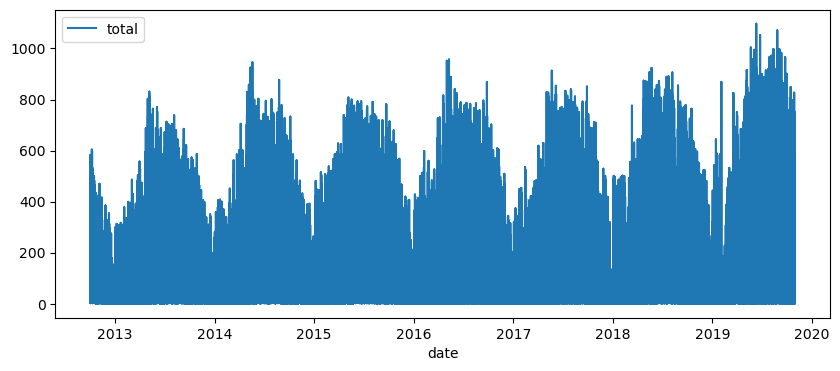

In [17]:
# Let's plot ridership overtime and visualize it:
fremont.plot(x='date', y='total', figsize=(10, 4))
plt.show()

In [18]:
# That's really messy. Let's try grouping the data so that it isn't on an hourly level.
# This time, we'll use Seaborn (import seaborn as sns) to plot, which gives more flexibility and presents a neater look.
sns.set_style("darkgrid")

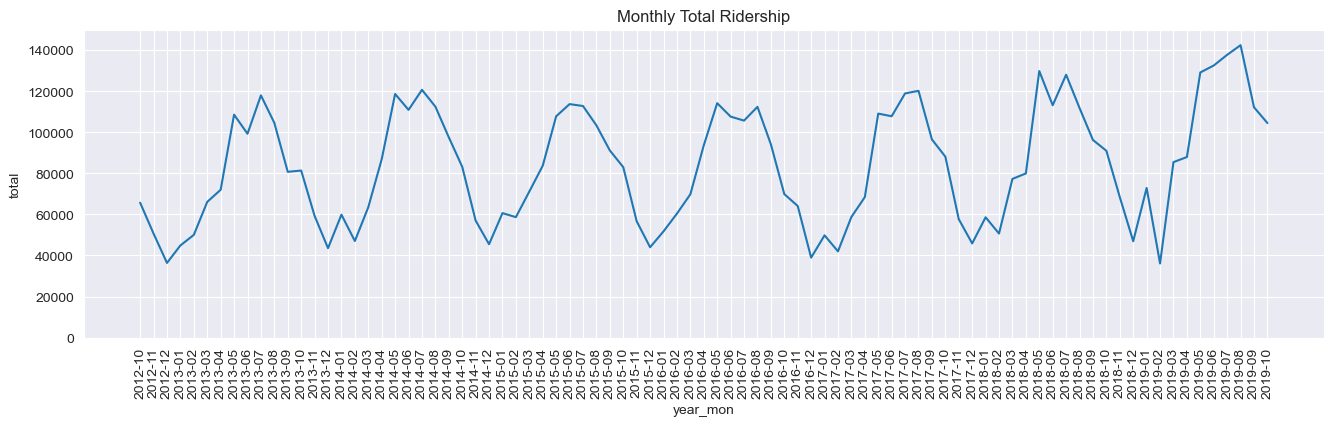

In [19]:
# Earlier on we created year and month fields. Let's visualize ridership by month over time:
fremont_monthly = fremont.groupby(by=['year_mon'], as_index=False)[['total', 'east_sw', 'west_sw']].agg('sum')
fremont_monthly['year_mon'] = fremont_monthly['year_mon'].map(str)
fig, ax = plt.subplots(1, 1, figsize = (16, 4))
sns.lineplot(ax=ax, data=fremont_monthly, x='year_mon', y='total')
plt.ylim(0, 150000)
plt.xticks(rotation=90)
plt.title("Monthly Total Ridership")
plt.show()

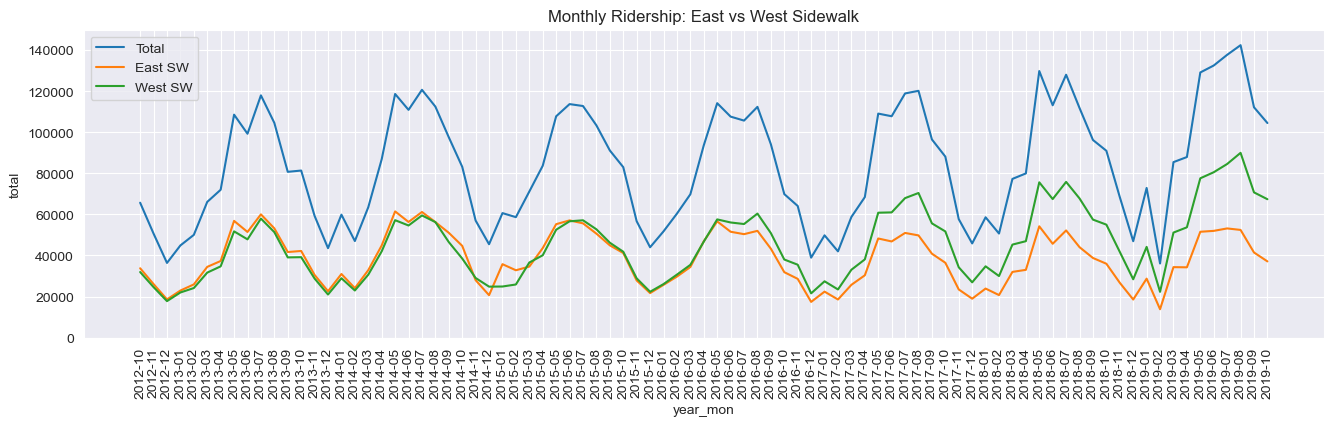

In [20]:
# Is there a difference between the East and West sidewalks?
fig, ax = plt.subplots(1, 1, figsize = (16, 4))
sns.lineplot(data=fremont_monthly, x='year_mon', y='total', label='Total')
sns.lineplot(data=fremont_monthly, x='year_mon', y='east_sw', label='East SW')
sns.lineplot(data=fremont_monthly, x='year_mon', y='west_sw', label='West SW')
plt.ylim(0, 150000)
plt.xticks(rotation=90)
plt.title('Monthly Ridership: East vs West Sidewalk')
plt.legend()
plt.show()

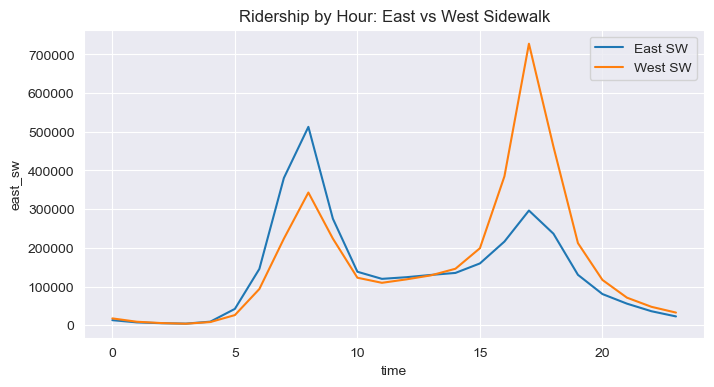

In [21]:
# How does ridership look on an hourly basis; is there a difference between the sidewalks?
fremont_by_hour = fremont.groupby(by='time', as_index=False)[['total', 'east_sw', 'west_sw']].agg('sum')
fremont_by_hour['time'] = fremont_by_hour['time'].map(lambda x: x.hour)

fig, ax = plt.subplots(1, 1, figsize = (8, 4))
sns.lineplot(data=fremont_by_hour, x='time', y='east_sw', label='East SW')
sns.lineplot(data=fremont_by_hour, x='time', y='west_sw', label='West SW')
plt.title('Ridership by Hour: East vs West Sidewalk')
plt.show()

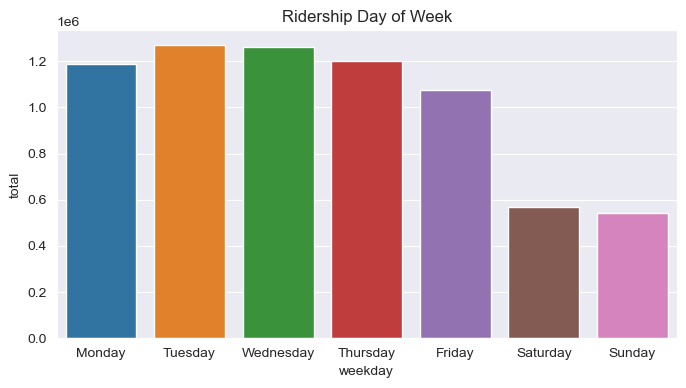

In [22]:
# How about ridership by day of week (0 is Monday and 6 is Sunday)?
fremont['weekday'] = fremont['datetime'].dt.day_of_week
fremont['day_name'] = fremont['datetime'].dt.day_name()
fremont_weekday = fremont.groupby(by=['weekday', 'day_name'], as_index=False)[['total', 'east_sw', 'west_sw']].agg('sum')

fig, ax = plt.subplots(1, 1, figsize = (8, 4))
sns.barplot(ax=ax, data=fremont_weekday, x='weekday', y='total')
ax.set_xticklabels(fremont_weekday['day_name'])
plt.title('Ridership Day of Week')
plt.show()

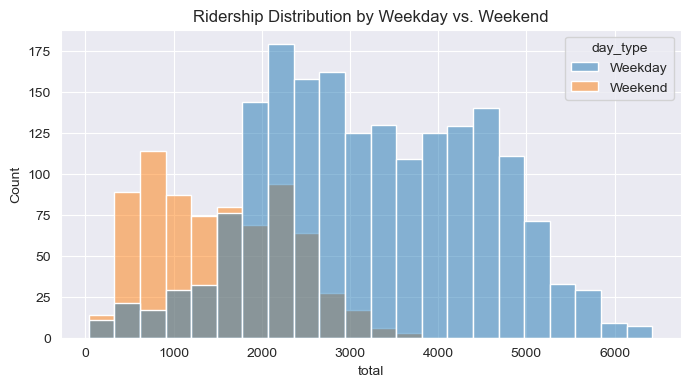

In [23]:
# It might be informative to plot the distributions of the weekends vs weekdays:
fremont_daily = fremont.groupby(by=['date', 'weekday'], as_index=False)[['total', 'east_sw', 'west_sw']].agg('sum')
fremont_daily['day_type'] = np.where(fremont_daily['weekday'] <= 4, 'Weekday', 'Weekend')

fig, ax = plt.subplots(1, 1, figsize = (8, 4))
sns.histplot(ax=ax, data=fremont_daily, x='total', hue='day_type')
plt.title('Ridership Distribution by Weekday vs. Weekend')
plt.show()

<font color='#43BFC7'>

**Part 4 Conclusions**

We can see a few important things from our basic data visualizations:
- First, there is unsurprsingly a very high seasonality in the data. Winter months see much lower ridership than summer months.
- Next, we can see that ridership on the West sidewalk has been increasing, while on the East sidewalk it has remained constant.
- We also see that there are 2 daily peaks in the ridership - once in the morning and again in the evening. These peaks also differ in which sidewalk sees heavier traffic.
- Finally, we see that bike ridership drops by ~half on weekends.

Thus, if we were building some model/system to help optimize load balancing, we'd expect that time of day, seasonality, and day of week would be important and highly predictive features (a hypothesis). We'd also have to look into why one sidewalk seems to be growing in popularity.</font>

<font color='#43BFC7'>

### **5. Exploring correlations**</font>

In [24]:
# Start by merging together the two datasets:
combined = pd.merge(left=fremont_daily, right=noaa, how='left', on='date')
combined.head(3)

,date,weekday,total,east_sw,west_sw,day_type,station,name,awnd,pgtm,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,fog,heavy-fog_mist,thunder,ice-pellets,hail,glaze,smoke,blowing-snow,mist,drizzle,rain,snow.1,freezing-rain
0,2012-10-03,2,3521.0,1760.0,1761.0,Weekday,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",16.33,NaN,0.0,0.0,0.0,NaN,66,46,10,20.0,23.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-10-04,3,3475.0,1708.0,1767.0,Weekday,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",14.54,NaN,0.0,0.0,0.0,NaN,66,47,20,20.0,21.0,25.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-10-05,4,3148.0,1558.0,1590.0,Weekday,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",12.75,NaN,0.0,0.0,0.0,NaN,71,48,360,360.0,17.9,21.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


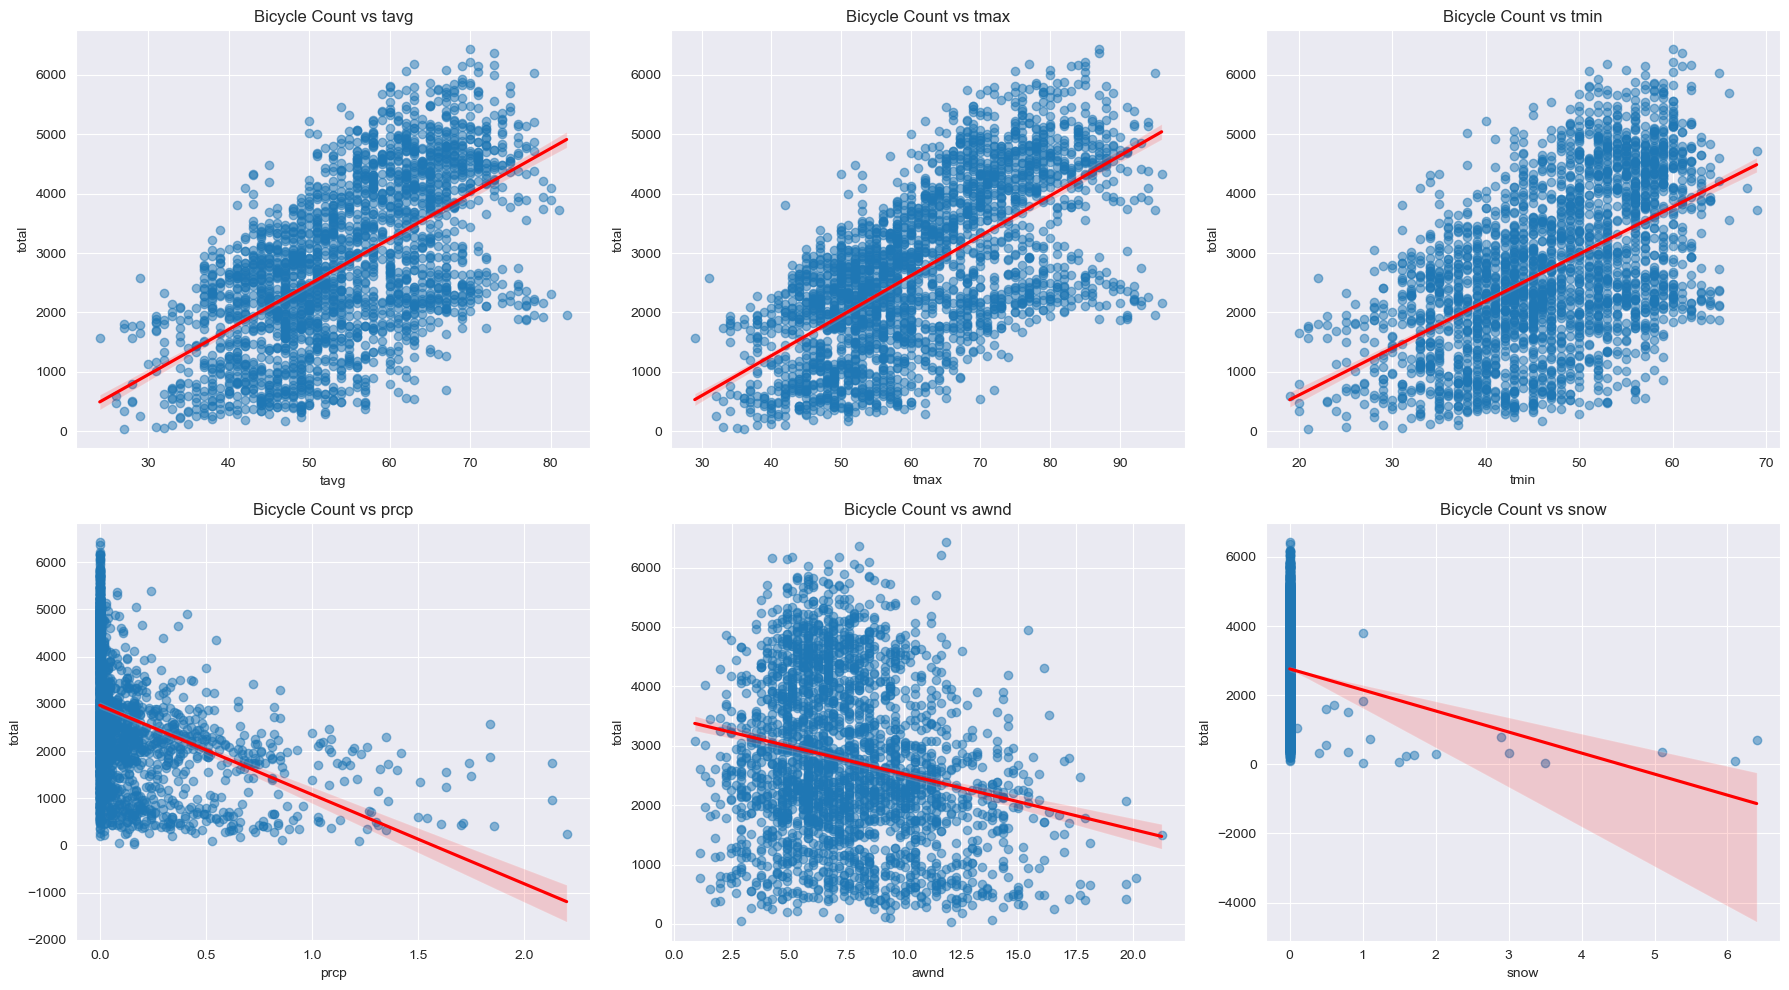

In [25]:
# Let's draw some correlation scatterplots of bicycle ridership against weather variables.
# Start by defining the weather variables that we'd like to see:
weather_factors = ["tavg", "tmax", "tmin", "prcp", "awnd", "snow"]

# Create scatter plots with trend lines
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

for i, factor in enumerate(weather_factors):
    sns.regplot(
        ax=axes[i], 
        x=combined[factor], 
        y=combined["total"], 
        scatter_kws={'alpha':0.5}, 
        line_kws={'color':'red'}
    )
    axes[i].set_title(f"Bicycle Count vs {factor}")
 
plt.tight_layout()
plt.show()

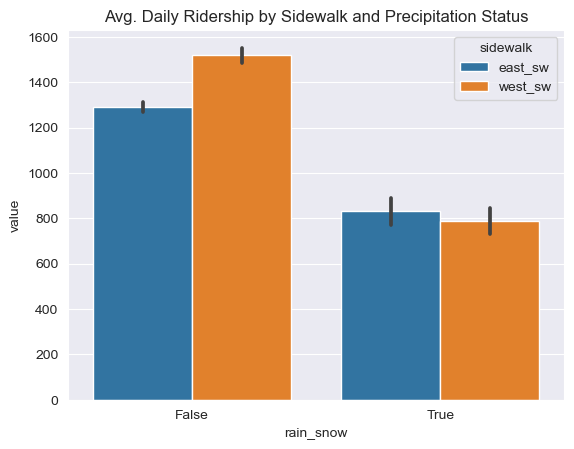

In [26]:
# Does the weather have any impact on direction of travel?
combined['rain_snow'] = pd.notnull(combined['rain']) | pd.notnull(combined['snow.1'])
tmp = combined.melt(id_vars=['date', 'rain_snow', 'tmax'], value_vars=['east_sw', 'west_sw'], var_name='sidewalk')

sns.barplot(data=tmp, x='rain_snow', y='value', hue='sidewalk')
plt.title("Avg. Daily Ridership by Sidewalk and Precipitation Status")
plt.show()

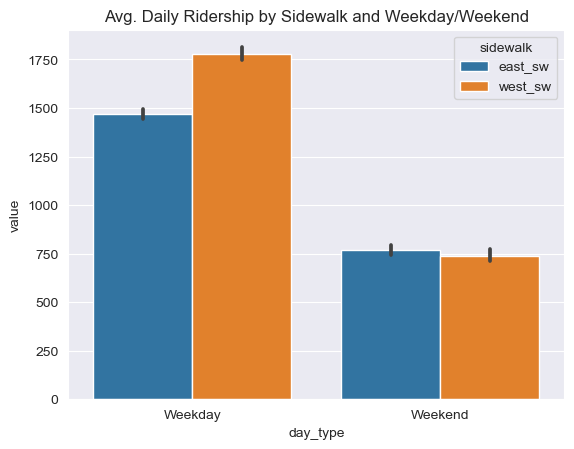

In [27]:
# On a similar note, does weekday/weekend impact direction of travel?
tmp = pd.merge(tmp, fremont_daily[['date', 'day_type']], how='left', on='date')

sns.barplot(data=tmp, x='day_type', y='value', hue='sidewalk')
plt.title("Avg. Daily Ridership by Sidewalk and Weekday/Weekend")
plt.show()

<font color='#43BFC7'>

**Part 5 Conclusions**

We can see correlations between ridership and several weather related variables. The temperature variables have a fairly strong relationship, same for precipitation and snow. Bicycle counts vs. Wind Gust shows a negative correlation but it's pretty weak.

Interestingly, when precipitation status (rain or snow) is False we see higher traffic on the West sidewalk, as we've noticed with the overall data, but when precipitation status is True we see slightly more traffic on the East sidewalk (though the difference is very slight and possibly insignificant). This indicates that there could be an interaction between precipitation status and sidewalk side, a possible hypothesis to explore in the future!

A very similar pattern can be seen with sidewalk side and weekday vs. weekend.</font>